In [7]:
import pandas as pd
import re

tweets_df = pd.read_csv('tweets.csv', index_col=0)

In [6]:
tweets_df.head()

,lang,text,edit_history_tweet_ids,id,geo.place_id
0,en,The Russell Wilson trade may go down as one of...,['1586724415185854467'],1586724415185854467,NaN
1,en,Russell Wilson did all that shit on that plane...,['1586724412430098434'],1586724412430098434,NaN
2,en,@CourtsSports0 Russell Wilson is the answer \n...,['1586724410135830529'],1586724410135830529,NaN
3,en,Russell Wilson threw a pick so Nathaniel Hacke...,['1586724372365967360'],1586724372365967360,NaN
4,en,As weird as it sounds (or would have sounded a...,['1586724357132279809'],1586724357132279809,NaN


In [11]:
extra_stopwords = ["The", "It", "it", "in", "In", "wh"]

tweets_df['text'] = [re.sub("https?:\/\/\S+", "", tweet) for tweet in tweets_df['text']]
tweets_df['text'] = [re.sub("#[A-Za-z0–9]+", " ", tweet) for tweet in tweets_df['text']]
tweets_df['text'] = [re.sub("#", " ", tweet) for tweet in tweets_df['text']]
tweets_df['text'] = [re.sub("\n", " ", tweet) for tweet in tweets_df['text']]
tweets_df['text'] = [re.sub("@[A-Za-z0–9]+", "", tweet) for tweet in tweets_df['text']]
tweets_df['text'] = [re.sub("RT", "", tweet) for tweet in tweets_df['text']]
tweets_df['text'] = [re.sub("^[a-zA-Z]{1,2}$", "", tweet) for tweet in tweets_df['text']]
tweets_df['text'] = [re.sub("\w*\d\w*", "", tweet) for tweet in tweets_df['text']]
for word in extra_stopwords:
    tweets_df['text'] = [tweet.replace(word, "") for tweet in tweets_df['text']]       

In [29]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /home/sali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/sali/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sali/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
import nltk
from nltk.corpus import stopwords

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    text_tokens = w_tokenizer.tokenize(text)
    return ' '.join(lemmatizer.lemmatize(w) for w in text_tokens if not w in stopwords.words('english'))
    # return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

tweets_df['clean_text'] = tweets_df['text'].apply(lemmatize_text)

In [40]:
from textblob import TextBlob

def getPolarity(tweet):
    sentiment_polarity = TextBlob(tweet).sentiment.polarity
    return sentiment_polarity

def getAnalysis(polarity_score):
    if polarity_score < 0:
        return "Negative"
    elif polarity_score == 0:
        return "Neutral"
    else:
        return "Positive"

def getSubjectivity(tweet):
    sentiment_subjectivity = TextBlob(tweet).sentiment.subjectivity
    return sentiment_subjectivity

def getSubAnalysis(subjectivity_score):
    if subjectivity_score <= 0.5:
        return "Objective"
    else:
        return "Subjective"
        
tweets_df["polarity"] = tweets_df["clean_text"].apply(getPolarity)
tweets_df["sentiment"] = tweets_df["polarity"].apply(getAnalysis)
tweets_df["subjectivity"] = tweets_df["clean_text"].apply(getSubjectivity)
tweets_df["sub_obj"] = tweets_df["subjectivity"].apply(getSubAnalysis)


(-1.1129928317635196,
 1.1006187320057477,
 -1.1006187372479035,
 1.1129928321258653)

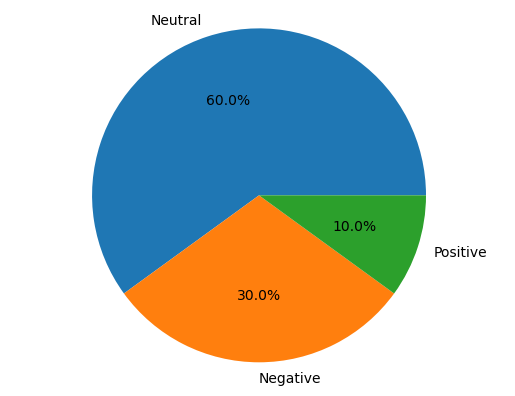

In [63]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
labels = (tweets_df['sentiment'].value_counts()/sum(tweets_df['sentiment'].value_counts())).keys()
sizes = (tweets_df['sentiment'].value_counts()/sum(tweets_df['sentiment'].value_counts())).values
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
